## Fragment long viral RNA 

In [1]:
from rouskinhf import convert
import pandas as pd
import numpy as np

from src import compare_frags

### SARS

In [2]:
## Import data from Sun

# Import ct file
data = convert(
    'ct',
    'data/SARS2/Sun/',
    name='SARS2',
    path_out='',
    filter=False
)
df = pd.DataFrame(data).T
sequence_Sun = df['sequence']['SARS2'].upper().replace('T','U')
paired_bases_Sun = np.array(df['structure']['SARS2'])


# Import shape file
UKN = -1000
data_shape = pd.read_excel('data/SARS2/Sun/GSE153984_SARS2-icSHAPE.xlsx', header=None)
data_shape.fillna(UKN, inplace=True)

full_shape_Sun = data_shape[2].values
assert ''.join(data_shape[1].tolist()).upper().replace('T','U') == sequence_Sun, 'Sequence mismatch'

Parsing ct files:   0%|          | 0/1 [00:00<?, ?it/s]

Parsing ct files: 100%|██████████| 1/1 [00:00<00:00, 32.51it/s]


Drop 0 datapoints with None values (null sequence or reference)


In [3]:
## Import data from Lan

# Import ct file
data = convert(
    'ct',
    'data/SARS2/Lan/',
    name='SARS',
    path_out='',
    filter=False
)
df = pd.DataFrame(data).T
sequence_Lan = df['sequence']['SARS']
paired_bases_Lan = np.array(df['structure']['SARS'])

# Import dms file
UKN = -1000
data_dms = pd.read_excel('data/SARS2/Lan/SARS_DMS.xlsx')
data_dms.fillna(UKN, inplace=True)

full_dms_Lan = data_dms['Vero (filtered)'].values
max_dms = np.median(full_dms_Lan[full_dms_Lan!=UKN][full_dms_Lan[full_dms_Lan!=UKN]>np.percentile(full_dms_Lan[full_dms_Lan!=UKN], 95)])
full_dms_Lan[full_dms_Lan!=UKN] =  full_dms_Lan[full_dms_Lan!=UKN] / max_dms
full_dms_Lan[full_dms_Lan>1] = 1

assert ''.join(data_dms['Nucleotide'].tolist()) == sequence_Lan, 'Sequence mismatch'

Parsing ct files: 100%|██████████| 1/1 [00:00<00:00, 38.09it/s]


Drop 0 datapoints with None values (null sequence or reference)


In [5]:
gold_data = compare_frags([sequence_Lan, sequence_Sun], [full_dms_Lan, full_shape_Sun], [paired_bases_Lan, paired_bases_Sun])

### HIV

In [18]:
from src import pairList2pairMatrix

versions = all_struct_HIV.columns[2:]
for i in range(len(versions)):
    for j in range(i+1, len(versions)):
        
        convert_to_CT(all_struct_HIV, column=versions[i], name='HIV', path='data/HIV/test/HIV.ct')
        data = convert(
            'ct',
            'data/HIV/Watts/',
            name='HIV',
            path_out='',
            filter=False
        )
        df = pd.DataFrame(data).T
        paired_bases = np.array(df['structure']['HIV'])

        matrix_1 = 


Index(['Watts09', 'RNAstructure, no SHAPE, cd600', 'PPfold, no SHAPE',
       'PPfold, SHAPE', 'GTfold, no SHAPE, no const.',
       'GTfold, SHAPE, no const.', 'GTfold, no SHAPE, cd600',
       'GTfold, SHAPE, cd600', 'UNAfold, no const.', 'UNAfold, cd600',
       'PETfold', 'RNAalifold', 'PPfold, re-normalized SHAPE'],
      dtype='object')

In [2]:
all_struct_HIV = pd.read_excel('data/HIV/nar-01265-r-2015-File010.xlsx', header=1)

def convert_to_CT(df, column, name, path):
    df_CT = df[['Position', 'Nucleotide ', column]].copy()

    df_CT['Position+1'] = df_CT['Position'] + 1
    df_CT['Position-1'] = df_CT['Position'] - 1
    df_CT[['Position', 'Nucleotide ', 'Position-1', 'Position+1', column, 'Position']].to_csv(path, sep='\t', index=False, header=[name, str(len(df))]+['']*4)


convert_to_CT(all_struct_HIV, column='Watts09', name='HIV', path='data/HIV/Watts/HIV.ct')
convert_to_CT(all_struct_HIV, column='PPfold, SHAPE', name='HIV', path='data/HIV/Sukosd/HIV.ct')

# Import shape file
UKN = -1000
data_shape = pd.read_csv('data/HIV/Sukosd/41586_2009_BFnature08237_MOESM312_ESM.txt', header=None, sep='\t')
data_shape.fillna(UKN, inplace=True)
full_shape_HIV = data_shape[2].values

In [3]:
# Import ct file from Watts
data = convert(
    'ct',
    'data/HIV/Watts/',
    name='HIV',
    path_out='',
    filter=False
)
df = pd.DataFrame(data).T
sequence_Watts = df['sequence']['HIV'].upper().replace('T','U')
paired_bases_Watts = np.array(df['structure']['HIV'])

assert ''.join(data_shape[1].tolist()).upper().replace('T','U') == sequence_Watts, 'Sequence mismatch'

Parsing ct files: 100%|██████████| 1/1 [00:00<00:00, 130.23it/s]

Drop 0 datapoints with None values (null sequence or reference)


In [4]:
# Import ct file from Sukosd
data = convert(
    'ct',
    'data/HIV/Sukosd/',
    name='HIV',
    path_out='',
    filter=False
)
df = pd.DataFrame(data).T
sequence_Sukosd = df['sequence']['HIV'].upper().replace('T','U')
paired_bases_Sukosd = np.array(df['structure']['HIV'])

assert ''.join(data_shape[1].tolist()).upper().replace('T','U') == sequence_Sukosd, 'Sequence mismatch'

Parsing ct files: 100%|██████████| 1/1 [00:00<00:00, 132.47it/s]

Drop 0 datapoints with None values (null sequence or reference)


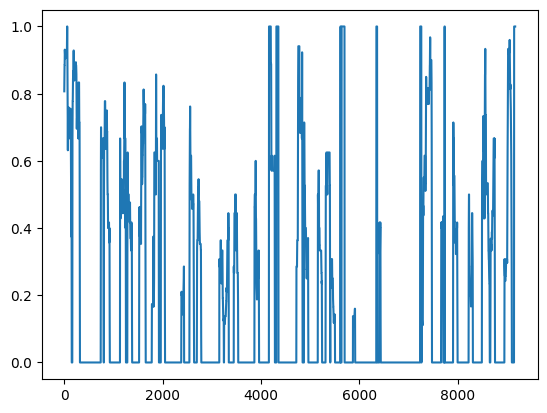

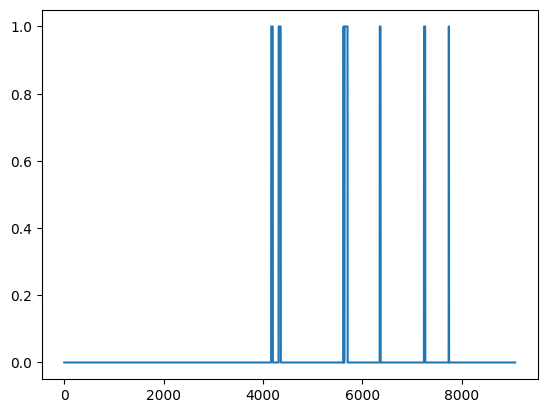

,sequence,dms
HIV_0,GGUCUCUCUGGUUAGACCAGAUCUGAGCCUGGGAGCUCUCUGGCUA...,"[-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ..."
HIV_1,GGGAACCCACUGCUUAAGCCUCAAUAAAGCUUGCCUUGAGUGCUCA...,"[0.61, 0.05, 0.06, 0.04, 0.01, 0.03, 0.42, 0.0..."


In [14]:
compare_frags([sequence_Sukosd, sequence_Watts], [full_shape_HIV, full_shape_HIV], [paired_bases_Sukosd, paired_bases_Watts],
              name='HIV', min_length=40, min_unpaired_length=1, min_auroc=0.8, min_f1=0.8)

In [13]:
from src import fragment_RNA
fragment_RNA(sequence_Watts, paired_bases_Watts, full_shape_HIV, name='HIV', min_length=40, min_unpaired_length=1, min_auroc=0.8).sequence.apply(len).value_counts()

1175    1
152     1
1452    1
62      1
546     1
1142    1
608     1
1184    1
498     1
398     1
404     1
164     1
437     1
49      1
82      1
Name: sequence, dtype: int64

In [11]:
def count_pair(sequence, paired_bases):
    dot = np.array(['.']*len(sequence))
    dot[paired_bases[:,0]] = '('
    dot[paired_bases[:,1]] = ')'
    dot = ''.join(dot)

    bracket_counter = [0]
    for i in range(len(dot)):

        if dot[i] == '(':
            bracket_counter.append(bracket_counter[-1]+1)
        elif dot[i] == ')':
            bracket_counter.append(bracket_counter[-1]-1)
        else:
            bracket_counter.append(bracket_counter[-1])


    return np.array(bracket_counter[1:])

import plotly.express as px
px.bar(x=range(len(sequence_Sukosd)), y=count_pair(sequence_Sukosd, paired_bases_Sukosd))

In [14]:
np.where(count_pair(sequence_Sukosd, paired_bases_Sukosd)==0)

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          46,   47,   48,   49,   50,   51,  351,  352,  353,  354,  355,
        9141, 9142, 9143, 9144, 9145, 9146, 9147, 9148, 9149, 9150, 9151,
        9152, 9153, 9154, 9155, 9156, 9157, 9158, 9159, 9160, 9161, 9162,
        9163, 9164, 9165, 9166, 9167, 9168, 9169, 9170, 9171, 9172]),)

In [66]:
from sklearn.metrics import roc_auc_score

# Convert to binary for AUROC
isUnpaired = np.ones(len(sequence_Sukosd))
isUnpaired[paired_bases_Sukosd.flatten()] = 0

roc_auc_score(isUnpaired[full_shape_HIV!=UKN], full_shape_HIV[full_shape_HIV!=UKN])

0.8009242267069459

In [65]:
import plotly.express as px
px.bar(y=full_shape_HIV[full_shape_HIV!=-1000])

## Convert to rouskinHF

In [15]:
import envbash
envbash.load.load_envbash('../.env')
from rouskinhf import convert, upload_dataset, get_dataset

## Pre-processing

In [6]:
import json

path = '/Users/yvesmartin/data/viral_fragments/viral_fragments.json'
raw = json.load(open(path))
data = {}

for k, v in raw.items():
    prefix = k
    for idx, (k2, v2) in enumerate(v.items()):
        data[f'{prefix}_{idx}'] = {'sequence': k2, 'dotbracket': v2}

json.dump(data, open('data/formatted_viral_fragments.json', 'w'), indent=2)
print(str(data)[:1000])

{'SARS_0': {'sequence': 'GACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGT', 'dotbracket': '.....((((...(((.((((((((.....((((((.(((((......)))))..)))))).........(((((((.((......)))))))))(((....)))))))))))))).))))'}, 'SARS_1': {'sequence': 'GAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACA', 'dotbracket': '....((((....(((((..(((((.(((.((((.((.((((......(((((....))))).)))).)))))))))))))).))))).((((....)))).....))))...........'}, 'SARS_2': {'sequence': 'GCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCC', 'dotbracket': '((((.....)))).(((((((((((((((..(((.....(((((....))))).....))).)))))))).(((((......)))))............)))))))..............'}, 'SARS_3': {'sequence': 'CTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATT

## RouskinHF filtering

In [9]:
from rouskinhf import convert

data = convert(
    'json',
    'data/formatted_viral_fragments.json',
    name='viral_fragments',
    path_out='data',
    filter=True
)

Parsing json file: 100%|██████████| 53/53 [00:00<00:00, 36448.29it/s]

Over a total of 53 datapoints, there are:
### OUTPUT
- 53 valid datapoints
### MODIFIED
- 0 multiple sequences with the same reference (renamed reference)
- 0 duplicate sequences with different structure / dms / shape
### FILTERED OUT
- 0 invalid datapoints (ex: sequence with non-regular characters)
- 0 datapoints with bad structures
- 0 duplicate sequences with the same structure / dms / shape


## To HuggingFace

In [16]:
from rouskinhf import upload_dataset

upload_dataset(
    'data/viral_fragments/data.json',
    commit_message='init commit',
)